<a href="https://colab.research.google.com/github/raphaeldiscky/ml-projects/blob/main/NLP%20model%20with%20LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('bbc-text.csv')
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [2]:
# one hot encoding 
category = pd.get_dummies(df.category)
df_new = pd.concat([df, category], axis=1)
df_new = df_new.drop(columns='category')
df_new

,text,business,entertainment,politics,sport,tech
0,tv future in the hands of viewers with home th...,0,0,0,0,1
1,worldcom boss left books alone former worldc...,1,0,0,0,0
2,tigers wary of farrell gamble leicester say ...,0,0,0,1,0
3,yeading face newcastle in fa cup premiership s...,0,0,0,1,0
4,ocean s twelve raids box office ocean s twelve...,0,1,0,0,0
...,...,...,...,...,...,...
2220,cars pull down us retail figures us retail sal...,1,0,0,0,0
2221,kilroy unveils immigration policy ex-chatshow ...,0,0,1,0,0
2222,rem announce new glasgow concert us band rem h...,0,1,0,0,0
2223,how political squabbles snowball it s become c...,0,0,1,0,0


In [3]:
# convert dataframe value to numpy array
text = df_new['text'].values
label = df_new[['business', 'entertainment','politics','sport','tech']].values

In [4]:
# create training and testing data
from sklearn.model_selection import train_test_split

text_train, text_test, label_train, label_test = train_test_split(text, label, test_size=0.2)

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# tokenization
tokenizer = Tokenizer(num_words=5000, oov_token='OOV')
tokenizer.fit_on_texts(text_train)
tokenizer.fit_on_texts(text_test)

# convert to sequences
train_sequences = tokenizer.texts_to_sequences(text_train)
test_sequences = tokenizer.texts_to_sequences(text_test)

# padding
train_padded = pad_sequences(train_sequences, maxlen=200, padding='post',truncating='post')
test_padded = pad_sequences(test_sequences, maxlen=200, padding='post',truncating='post')

In [6]:
import tensorflow as tf

# create model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax'),
])

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [7]:
# create callback class
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9 and logs.get('val_accuracy')>0.9):
      print("\nAccuracy and val_accuracy already reached > 90%!")
      self.model.stop_training = True
callbacks = myCallback()


history = model.fit(train_padded, label_train, epochs=50, validation_data=(test_padded, label_test), verbose=2, callbacks=[callbacks])

Epoch 1/50
56/56 - 9s - loss: 1.6018 - accuracy: 0.2236 - val_loss: 1.5909 - val_accuracy: 0.2360
Epoch 2/50
56/56 - 6s - loss: 1.5002 - accuracy: 0.3758 - val_loss: 1.2925 - val_accuracy: 0.4382
Epoch 3/50
56/56 - 6s - loss: 1.1028 - accuracy: 0.5011 - val_loss: 0.8975 - val_accuracy: 0.5708
Epoch 4/50
56/56 - 6s - loss: 0.8257 - accuracy: 0.6067 - val_loss: 0.9057 - val_accuracy: 0.5843
Epoch 5/50
56/56 - 6s - loss: 0.6997 - accuracy: 0.6219 - val_loss: 0.8565 - val_accuracy: 0.6607
Epoch 6/50
56/56 - 6s - loss: 0.7386 - accuracy: 0.6337 - val_loss: 0.9917 - val_accuracy: 0.4944
Epoch 7/50
56/56 - 6s - loss: 0.6530 - accuracy: 0.6545 - val_loss: 0.6542 - val_accuracy: 0.7056
Epoch 8/50
56/56 - 6s - loss: 0.4704 - accuracy: 0.7904 - val_loss: 0.6550 - val_accuracy: 0.7191
Epoch 9/50
56/56 - 6s - loss: 0.4023 - accuracy: 0.8640 - val_loss: 0.6373 - val_accuracy: 0.8022
Epoch 10/50
56/56 - 6s - loss: 0.3348 - accuracy: 0.9017 - val_loss: 0.6394 - val_accuracy: 0.8270
Epoch 11/50
56/56 -

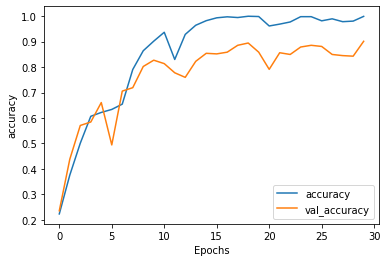

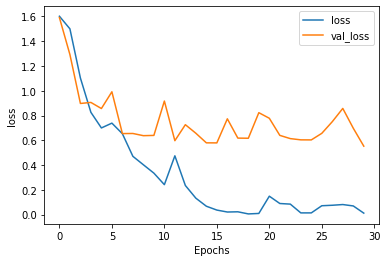

In [19]:
import matplotlib.pyplot as plt

# create plot function
def plot(history, input):
  plt.plot(history.history[input])
  plt.plot(history.history['val_'+input])
  plt.ylabel(input)
  plt.xlabel("Epochs")
  plt.legend([input, 'val_'+input])
  plt.show()

plot(history, "accuracy")
plot(history, "loss")

In [ ]:
#